# Chapter 3 - Linear Regression

Source: An Introduction to Statistical Learning

Notebook Source: [ISL-python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/tree/master/Notebooks)

Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

### Loading Datasets

In [27]:
import pandas as pd

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
advertising = pd.read_csv("./data/Advertising.csv", index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 3.1 Simple Linear Regression

### Least Squares Fit
For the Advertising data, we will plot the least squares fit for the regression of `sales` onto `TV`.

The simple linear regression formula to indicate this relationship is:
    
`sales` ≈ $\beta_{0} + \beta_{1} x$ `TV`

In [13]:
# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

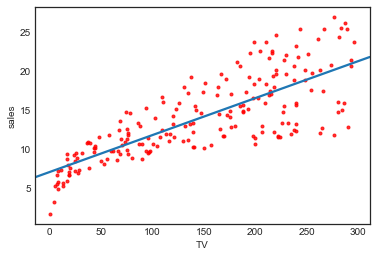

In [26]:
sns.regplot(advertising.TV, advertising.sales, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

The fit is found by minimizing the sum of the squared errors. Each of the gray line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### Regression Coefficient

Now we define a linear regression model with the `sales` column as the response and the `TV` column as the feature in the `advertising` dataset.

In [29]:
# Ordinary Least Squares (ols) 

lm = smf.ols(formula='sales ~ TV', data = advertising)

print(lm.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        11:13:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

#### Confidence Internval

From the regression results from above we can see in the case of the advertising data, the __95% confidence interval for $\beta_{0}$ is `[ 6.130, 7.935]` and the 95% confidence interval for $\beta_{1}$ is `[0.042, 0.053]`.__

Therefore we cna concluse that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units. Furthermore, for each $1,000 increase in TV advertising, there will be an average increase in sales of between 42 and 53 units. 

### Hypothesis Testing

Standard errors can alos be used to perform hypothesis tests on the coefficient. 
- $H_0 : \beta_1 = 0$ _(H0 : There is no relationship between X and Y)_
- $H_a : \beta_1 = 0$ _(Ha : There is some relationship between X and Y)_

To test the null hypothesis, we will need to determine wither beta 1-hat (our estimate for beta1) is sufficiently far from zero that we can be confident that beta 1 is non-zero. We can compute this by using the _t-distribution_ to test this hypothesis:

$t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}$

Before performing the test we will check for normality assumption before using the test.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


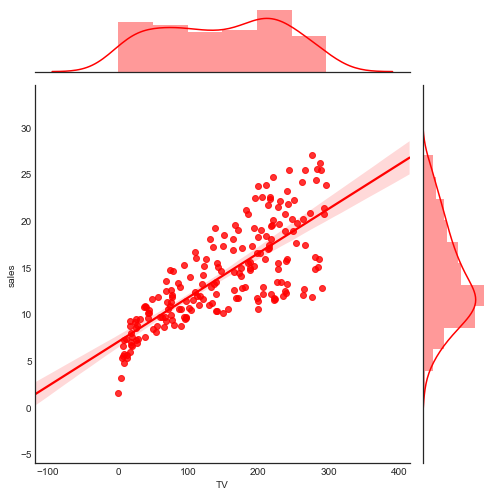

In [54]:
sns.jointplot("TV", "sales", data=advertising, kind="reg",
              color="r", height=7)

appears realitively normal. 

Next we will perform the t-test, to identify the probability of observing any real value equal to |t| or larger, assuming beta1 = 0. 

In [32]:
est = smf.ols('sales ~ TV', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


The above table provides details of the least squares model for the regression of number of units sold on TV advertising budget for the Advertising data. Notice that the coeﬃcients for ˆ β0 and ˆ β1 are very large relative to their standard errors, so the t-statistics are also large; the probabilities of seeing such values if H0 is true are virtually zero. Hence we can conclude that β0 != 0 and β1 != 0

#### Conclusion
we see a small p-value we can infer that there is an association between the predictor and the response and we will __reject the null hypothesis__ that is, we declare a relaitonshop between X and Y, since the p-value is less than our alpha of 0.05. 

`.coef_` gives the coefficients and `.intercept_` gives the estimated intercepts.

In [51]:
import sklearn.linear_model as skl_lm

regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print('Estimated intercept coefficient: ',regr.intercept_)
print('Number of coefficients: ',len(regr.coef_))

Estimated intercept coefficient:  7.032593549127693
Number of coefficients:  1


In [ ]:
pd.DataFrame(zip(X))

In [10]:
credit = pd.read_csv("./data/Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [12]:
# create a new column to indicate binary value of student No = 0; Yes = 1
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.Student2.head(2)

1    0
2    1
Name: Student2, dtype: int64